In [31]:
# Import dependencies
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import plotly.express as px


# 1: Prepare the Data

In [32]:
myopia_df = pd.read_csv("./Starter_Code_4/myopia.csv")

myopia_df.head()


,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [33]:
label_myopia = myopia_df['MYOPIC']

label_myopia.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [34]:
myopia_df = myopia_df.drop('MYOPIC', axis=1)

myopia_df.head ()


,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [35]:
# Check for null values
myopia_df.info ()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        618 non-null    int64  
 1   SPHEQ      618 non-null    float64
 2   AL         618 non-null    float64
 3   ACD        618 non-null    float64
 4   LT         618 non-null    float64
 5   VCD        618 non-null    float64
 6   SPORTHR    618 non-null    int64  
 7   READHR     618 non-null    int64  
 8   COMPHR     618 non-null    int64  
 9   STUDYHR    618 non-null    int64  
 10  TVHR       618 non-null    int64  
 11  DIOPTERHR  618 non-null    int64  
 12  MOMMY      618 non-null    int64  
 13  DADMY      618 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 67.7 KB


In [36]:
# Check for any duplicates
myopia_df.duplicated().sum()


0

In [37]:
# Scale the data 
scaler_s = StandardScaler()
scaled_myopia = scaler_s.fit_transform(myopia_df[["AGE", "SPHEQ", "AL", "ACD", "LT", "VCD", "SPORTHR","READHR", "COMPHR", 
                                         "STUDYHR", "TVHR", "DIOPTERHR", "MOMMY", "DADMY"]])
scaled_myopia_df =  pd.DataFrame(scaled_myopia,columns= myopia_df.columns)

scaled_myopia_df.head()       



,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


In [38]:
scaled_myopia[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

# 2. Dimensionality Reduction

In [39]:
pca = PCA(n_components=0.9)

myopia_pca = pca.fit_transform(scaled_myopia_df)

pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [40]:
myopia_pca.shape


(618, 10)

In [42]:
t_s_n_e = TSNE(learning_rate=300,perplexity=40,n_components=3)

tsne_features = t_s_n_e.fit_transform(myopia_pca)

/Users/amarrai/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [43]:
tsne_features.shape


(618, 3)

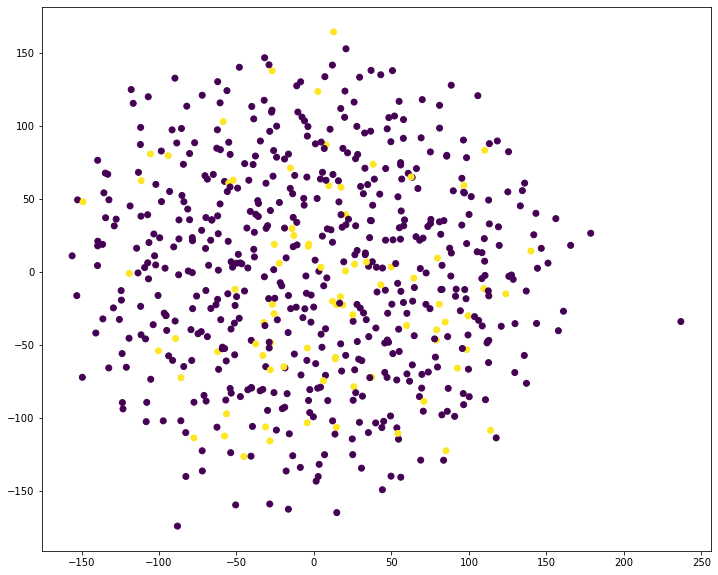

In [44]:
plt.subplots (figsize=(12, 10))

plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=label_myopia)

plt.show()

# 3. Perform a Cluster Analysis with K-means

In [54]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k: 
    km = KMeans(n_clusters=i, random_state=23)
    km.fit(myopia_df)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

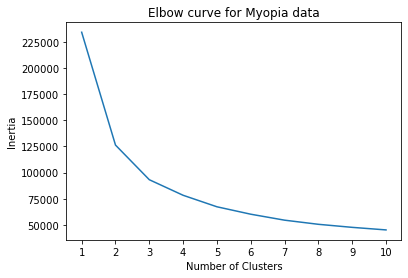

In [55]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])

plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Myopia data')

#plt.grid()
plt.show()

Elbow is at K=3 meaning that the data can be split into 3 different groups.

# 4. Make a Recommendation

In [47]:
pca_df = pd.DataFrame(tsne_features, columns=["pc1", "pc2","pc3",])
pca_df.head()


,pc1,pc2,pc3
0,26.199514,5.385159,42.308434
1,-54.102875,-79.828384,16.472782
2,-149.471313,-72.133827,30.497749
3,-12.967544,25.085300,14.386973
4,94.449532,-26.505558,84.922966


In [48]:
km_model = KMeans(n_clusters=3, random_state=45)
km_model.fit(pca_df)

predicted_clusters = km_model.predict(pca_df)
pca_df['group'] = km_model.labels_

pca_df.head()

,pc1,pc2,pc3,group
0,26.199514,5.385159,42.308434,0
1,-54.102875,-79.828384,16.472782,0
2,-149.471313,-72.133827,30.497749,0
3,-12.967544,25.085300,14.386973,1
4,94.449532,-26.505558,84.922966,0


In [50]:
fig = px.scatter_3d(
    pca_df,
    x="pc3",
    y="pc2",
    z="pc1",
    color="group",
    symbol="group",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

As shown in the model above, there are 3 clusters which supports the argument from previous models above. When zooming into the model, there is very small overlaps however it can quite easily be seen that there are 3 clusters. 